In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv(r'/Users/allen/Documents/GitHub/ML7331-Lab1/airline_merged.csv',low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#removing unwanted column from previous export
df.drop(columns =['Unnamed: 0'],axis =1)

,year,month,day,day_of_week,airline_cd,airline_name,flight_number,tail_number,origin_airport,airport_origin,city_origin,state_origin,country_origin,latitude_origin,longitude_origin,destination_airport,airport_destination,city_destination,state_destination,country_destination,latitude_destination,longitude_destination,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,AS,Alaska Airlines Inc.,98,N407AS,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,American Airlines Inc.,2336,N3KUAA,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,US Airways Inc.,840,N171US,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,American Airlines Inc.,258,N3HYAA,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,Alaska Airlines Inc.,135,N527AS,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,JetBlue Airways,688,N657JB,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,BOS,Gen. Edward Lawrence Logan International Airport,Boston,MA,USA,42.36435,-71.00518,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,JetBlue Airways,745,N828JB,JFK,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893,PSE,Mercedita Airport,Ponce,PR,USA,18.00830,-66.56301,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,JetBlue Airways,1503,N913JB,JFK,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893,SJU,Luis Muñoz Marín International Airport,San Juan,PR,USA,18.43942,-66.00183,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,JetBlue Airways,333,N527JB,MCO,Orlando International Airport,Orlando,FL,USA,28.42889,-81.31603,SJU,Luis Muñoz Marín International Airport,San Juan,PR,USA,18.43942,-66.00183,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#dropping highly correlated columns
#https://www.codegrepper.com/code-examples/python/how+to+drop+highly+correlated+features
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

df = df.drop(columns =to_drop, axis=1)

/var/folders/cn/_lgzxbk177j14_b82nbl10br0000gn/T/ipykernel_80766/168296205.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [6]:
df.head()

,Unnamed: 0,year,day,day_of_week,airline_cd,airline_name,flight_number,tail_number,origin_airport,airport_origin,city_origin,state_origin,country_origin,latitude_origin,longitude_origin,destination_airport,airport_destination,city_destination,state_destination,country_destination,latitude_destination,longitude_destination,scheduled_departure,departure_delay,taxi_out,scheduled_time,wheels_on,taxi_in,scheduled_arrival,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,0,2015,1,4,AS,Alaska Airlines Inc.,98,N407AS,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,5,-11.0,21.0,205.0,404.0,4.0,430,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2015,1,4,AA,American Airlines Inc.,2336,N3KUAA,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559,10,-8.0,12.0,280.0,737.0,4.0,750,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2015,1,4,US,US Airways Inc.,840,N171US,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313,20,-2.0,16.0,286.0,800.0,11.0,806,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2015,1,4,AA,American Airlines Inc.,258,N3HYAA,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056,20,-5.0,15.0,285.0,748.0,8.0,805,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2015,1,4,AS,Alaska Airlines Inc.,135,N527AS,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,25,-1.0,11.0,235.0,254.0,5.0,320,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#selecting 5 busiest airports in US
#airports = ['ATL','DFW','ORD','LAX','DEN']
airports = ['DFW']

In [8]:
df_air = df.loc[df['origin_airport'].isin(airports)]

In [9]:
df_air.describe()

,Unnamed: 0,year,day,day_of_week,flight_number,latitude_origin,longitude_origin,latitude_destination,longitude_destination,scheduled_departure,departure_delay,taxi_out,scheduled_time,wheels_on,taxi_in,scheduled_arrival,diverted,cancelled,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
count,2.395510e+05,239551.0,239551.000000,239551.000000,239551.000000,2.395510e+05,2.395510e+05,239551.000000,239551.000000,239551.000000,233658.000000,233383.000000,239551.000000,233177.000000,233177.000000,239551.000000,239551.000000,239551.000000,50478.000000,50478.000000,50478.000000,50478.000000,50478.000000
mean,2.683140e+06,2015.0,15.644890,3.945598,1999.527111,3.289595e+01,-9.703720e+01,35.454168,-95.072603,1406.443325,11.528820,17.242344,134.791293,1556.667347,6.466109,1579.647649,0.002713,0.026107,10.543623,0.113000,21.174888,20.654245,5.074389
std,1.672708e+06,0.0,8.784501,1.996657,1155.423485,1.391814e-10,1.210625e-10,5.164937,14.372262,458.043842,36.308279,8.543331,60.350783,507.568388,5.213076,487.907272,0.052020,0.159454,22.054115,2.274275,39.279341,39.726000,24.350348
min,7.000000e+01,2015.0,1.000000,1.000000,4.000000,3.289595e+01,-9.703720e+01,18.439420,-157.922410,140.000000,-28.000000,1.000000,33.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.243666e+06,2015.0,8.000000,2.000000,1164.000000,3.289595e+01,-9.703720e+01,31.611290,-103.057370,1025.000000,-4.000000,13.000000,84.000000,1155.000000,4.000000,1206.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.577904e+06,2015.0,16.000000,4.000000,2214.000000,3.289595e+01,-9.703720e+01,35.214010,-93.825600,1400.000000,-1.000000,15.000000,133.000000,1555.000000,5.000000,1604.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
75%,3.935769e+06,2015.0,23.000000,6.000000,2810.000000,3.289595e+01,-9.703720e+01,39.858410,-84.426940,1820.000000,11.000000,19.000000,170.000000,1950.000000,7.000000,1959.000000,0.000000,0.000000,15.000000,0.000000,27.000000,26.000000,0.000000
max,5.819003e+06,2015.0,31.000000,7.000000,6529.000000,3.289595e+01,-9.703720e+01,61.174320,-66.001830,2359.000000,1377.000000,225.000000,523.000000,2400.000000,197.000000,2359.000000,1.000000,1.000000,664.000000,190.000000,942.000000,1331.000000,862.000000


In [10]:
#selecting columns that are dtype != numeric
non_numeric = df_air.select_dtypes(exclude = np.number).columns

In [11]:
#create binary response for logistic regression
# create a function
def is_delayed(delay,axis=1):
    if delay <= 0:
        return 0
    else:
        return 1
    
# create a new column based on condition
df_air['is_delay'] = df_air.loc[:,'departure_delay'].apply(is_delayed)

/var/folders/cn/_lgzxbk177j14_b82nbl10br0000gn/T/ipykernel_80766/1089111569.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air['is_delay'] = df_air.loc[:,'departure_delay'].apply(is_delayed)


In [12]:
#Departure Delay - response
#altered from https://www.statology.org/one-hot-encoding-in-python/

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df_air[non_numeric]).toarray())

#return column names from encoder
encoder_df.columns = encoder.get_feature_names_out()

#merge one-hot encoded columns back with original DataFrame
encoded = df_air.join(encoder_df)

In [13]:
#drop original columns
final_df = encoded.drop(non_numeric, axis=1)

#head(final_df)

In [14]:
feature_cols = final_df.loc[:, final_df.columns != 'is_delay'].columns
X = final_df[feature_cols] # Features
y = final_df.is_delay # Target variable

In [15]:
#split dataset in features and target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [16]:
#imputing 0 into NaN values for logistic regression after OHE
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

In [17]:
#checking shape of data
print('X_train shape: ',X_train.shape,'\n')
print('X_test shape: ',X_test.shape,'\n')
print('y_train shape: ',y_train.shape,'\n')
print('y_test shape: ',y_test.shape)

X_train shape:  (179663, 3397) 

X_test shape:  (59888, 3397) 

y_train shape:  (179663,) 

y_test shape:  (59888,)


In [23]:
#https://towardsdatascience.com/getting-the-most-out-of-scikit-learn-pipelines-c2afc4410f1a

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# max_iter=10000 increases accuracy, precision & recall to ~99.7%
logistic = LogisticRegression(solver = 'saga',penalty='elasticnet',l1_ratio = 0.5,tol=0.1 )
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('logistic',
                 LogisticRegression(l1_ratio=0.5, penalty='elasticnet',
                                    solver='saga', tol=0.1))])

In [24]:
#predict
y_pred=pipe.predict(X_test)

In [25]:
#Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7837630243120491
Precision: 0.9608414003930417
Recall: 0.5154023347518838


<AxesSubplot:>

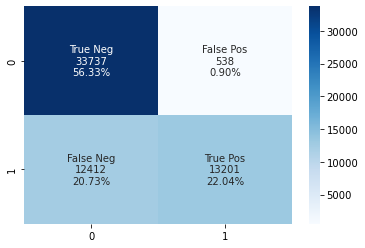

In [26]:
# code from: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

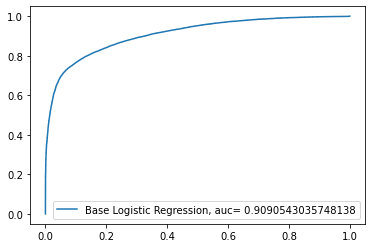

In [27]:
#ROC Curve
y_pred_proba = pipe.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Base Logistic Regression, auc= "+str(auc))
plt.legend(loc=4)
plt.show()